<a href="https://colab.research.google.com/github/l0bus/DatayAnalitics_Proyectos/blob/main/Proyecto5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 5 - Data Analitics
# Luis Miguel Manrique Murriel

## 1) Introducción

### Entendimiento del dataset

Como todos sabemos, el chocolate es una golosina muy popular en el mundo. EEUU llega a consumir 1.3 billones de kilos de chocolate anualmente. Sin embargo, como en muchas otras cosas, la calidad varía un montón.

El dataset consiste en el rating de expertos sobre casi 1800 chocolates, entre otra información interesante, como por ejemplo: origen del chocolate, porcentaje de cacao, origen de los granos, etc. Un poco más adelante profundizaremos en el tema.

La información esta centrada en chocolates oscuros, con el fin de hacer una apreciación del sabor del cacao (considerando que el chocolate oscuro es el que mayor porcentaje de cacao tiene).

Algunas preguntas que nos interesaran responder a lo largo del desarollo del analisis son:


- ¿De donde vienen los mejores granos de cacao?

- ¿Qué país produce los chocolates de mejor calidad?

- ¿Qué relación hay entre el porcentaje de cacao y la calidad del chocolate?



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler



from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix



from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
pd.set_option('display.max_columns', 500)
import missingno as msno
from datetime import datetime, timedelta
from matplotlib import rcParams
#import xgboost

%matplotlib inline
sns.set()
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)




In [ ]:
path = "/content/Data Rating.csv"

df = pd.read_csv(path, skipinitialspace=True, skip_blank_lines=False)
df.head(3)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo


In [ ]:
df.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

Para irnos familiarizando un poco con el dataset, a continuación tendremos una pequeña descripción de cada una de las columnas.

In [ ]:
print("Cantidad de filas: ",df.shape[0], "Cantidad de columnas: ",df.shape[1])

Cantidad de filas:  1795 Cantidad de columnas:  9


### Familiarización con las columnas del dataset




**1) Company:** Compañía productora del chocolate (objeto - string).

**2) Specific Bean Origin or Bar Name:** La región específica de origen del chocolate (objeto - string).

**3) REF:** Un valor referido a cuando fue ingresada la crítica al dataset. Mayor número = opinión más reciente (int).

**4) Review Date:** Fecha de la publicación de la crítica (int).

**5) Cocoa Percent:** Porcentaje de cacao del chocolate (objeto - string).

**6) Company Location:** País de la empresa productora (objeto - string).

**7) Rating:** Rating del experto sobre el chocolate (float).

**8) Bean Type:** La variedad del grano de cacao usado en el chocolate (objeto - string).

**9) Broad Bean Origin:** La región de origen del grano de cacao (objeto - string). 

In [ ]:
df.head(1)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome


Como vemos, el nombre de las columnas necesitará un pequeño procesamiento para poder usarlas de manera más fácil y práctica. Lo haremos en seguida.

In [ ]:
#Sacamos los \n que aparecen en las columnas
df.columns = df.columns.str.replace("\n", " ")
df.head(1)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome


In [ ]:
#Sacamos los parentesis y lo que tenia dentro en la primera columna
df.columns = df.columns.str.replace(r"\(.*\)","")
df.head(1)

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome


In [ ]:
#Sacamos los espacios que se encuentran delante de las columnas
df.columns = df.columns.str.rstrip()
df.head(1)

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome


Veremos las dimensiones del dataset e informacion que nos sera de ayuda para entenderlo mejor.

In [ ]:
df.describe()

,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [ ]:
print("Cantidad de instancias nulas por columna: ")
print(df.isnull().sum())

print("% de instancias nulas por columna: ")
print(df.isnull().mean())

Cantidad de instancias nulas por columna: 
Company                             0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64
% de instancias nulas por columna: 
Company                             0.000000
Specific Bean Origin or Bar Name    0.000000
REF                                 0.000000
Review Date                         0.000000
Cocoa Percent                       0.000000
Company Location                    0.000000
Rating                              0.000000
Bean Type                           0.000557
Broad Bean Origin                   0.000557
dtype: float64


Parece que tenemos una cantidad de instancias nulas muy baja. Suena positivo.

De acuerdo a la fuente, la columna "Specific Bean Origin or Bar Name" corresponde a la región específica de origen de la barra de chocolate. Teniendo eso en cuenta, el nombre resultaría algo confuso, asi que renombraremos la columna.

In [ ]:
df.rename(columns={"Specific Bean Origin or Bar Name" : "Chocolate Bar Origin"}, inplace =True)#["Specific Bean Origin or Bar Name"]

In [ ]:
df.columns

Index(['Company', 'Chocolate Bar Origin', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type',
       'Broad Bean Origin'],
      dtype='object')

## 2)  Preprocesamiento de features

### Creación de variable target

Como equipo de trabajo, decidimos definir una variable target que no venía dada en el dataset. Ésta será binaria (0 y 1), y será basada en la columna "Rating".  

Por criterio propio, definimos que si el "Rating" es mayor o igual a 3.5, será considerado un chocolate aceptable o bueno, y por el lado contrario, bajo dicho número será inaceptable o malo.

Muy importante ahora tener en cuenta que la feature "Rating" formará directamente nuestra target, por lo tanto no la podremos utilizar si queremos un modelo fiable y realista.


In [ ]:
df["chocolate_acceptance"]=df.Rating.apply(lambda x: 1 if x>=3.5 else 0)

Crearemos una version con "yes" and "no", para posteriores visualizaciones.

In [ ]:
df["chocolate_acceptance_yn"]=df["chocolate_acceptance"].apply(lambda x : "yes" if x==1 else "no")

In [ ]:
df.head(1)

,Company,Chocolate Bar Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,chocolate_acceptance,chocolate_acceptance_yn
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,1,yes


### "Cocoa Percent" de object - string a float

In [ ]:
df["Cocoa Percent"]=df["Cocoa Percent"].str[:2].astype(float)/100


### Creación de columna "Review date"  en formato datetime

In [ ]:
df.corr()

,REF,Review Date,Cocoa Percent,Rating,chocolate_acceptance
REF,1.000000,0.985076,0.067270,0.101030,0.045046
Review Date,0.985076,1.000000,0.063565,0.099846,0.040028
Cocoa Percent,0.067270,0.063565,1.000000,0.108469,0.018120
Rating,0.101030,0.099846,0.108469,1.000000,0.776261
chocolate_acceptance,0.045046,0.040028,0.018120,0.776261,1.000000


A primera vista, "Review Date" no parece tener relación importante con nuestro target "chocolate_acceptance". De igual manera, agregaremos una columna con la feature "Review Date" en formato datetime, para ver si nos sirve en el análisis posterior.

In [ ]:
df.dtypes

Company                     object
Chocolate Bar Origin        object
REF                          int64
Review Date                  int64
Cocoa Percent              float64
Company Location            object
Rating                     float64
Bean Type                   object
Broad Bean Origin           object
chocolate_acceptance         int64
chocolate_acceptance_yn     object
dtype: object

In [ ]:
df["review_date_datetime"]=df["Review Date"].apply(lambda x : str(x))

In [ ]:
df.dtypes

Company                     object
Chocolate Bar Origin        object
REF                          int64
Review Date                  int64
Cocoa Percent              float64
Company Location            object
Rating                     float64
Bean Type                   object
Broad Bean Origin           object
chocolate_acceptance         int64
chocolate_acceptance_yn     object
review_date_datetime        object
dtype: object

In [ ]:
df["review_date_datetime"]=df["review_date_datetime"].apply(lambda x : datetime.strptime(x,"%Y"))

In [ ]:
df.dtypes

Company                            object
Chocolate Bar Origin               object
REF                                 int64
Review Date                         int64
Cocoa Percent                     float64
Company Location                   object
Rating                            float64
Bean Type                          object
Broad Bean Origin                  object
chocolate_acceptance                int64
chocolate_acceptance_yn            object
review_date_datetime       datetime64[ns]
dtype: object

### Valores Nulos

Volviendo al tema de los nulos, la proporción de éstos es ínfima, por lo que tomamos la decision de dropearlos.

In [ ]:
df.isnull().mean()

Company                    0.000000
Chocolate Bar Origin       0.000000
REF                        0.000000
Review Date                0.000000
Cocoa Percent              0.000000
Company Location           0.000000
Rating                     0.000000
Bean Type                  0.000557
Broad Bean Origin          0.000557
chocolate_acceptance       0.000000
chocolate_acceptance_yn    0.000000
review_date_datetime       0.000000
dtype: float64

In [ ]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)


(1795, 12)
(1793, 12)


In [ ]:
df.isnull().mean()

Company                    0.0
Chocolate Bar Origin       0.0
REF                        0.0
Review Date                0.0
Cocoa Percent              0.0
Company Location           0.0
Rating                     0.0
Bean Type                  0.0
Broad Bean Origin          0.0
chocolate_acceptance       0.0
chocolate_acceptance_yn    0.0
review_date_datetime       0.0
dtype: float64

## 3) EDA (Exploratory Data Analysis)

Es momento de empezar con el análisis exploratorio de los datos.

### Distribución del target

### "chocolate_acceptance"

In [ ]:
print("Distribución de la variable target: ")
print(df.chocolate_acceptance.value_counts())
print("Distribución de la variable target en %: ")
print(df.chocolate_acceptance.value_counts()/df.chocolate_acceptance.count())
target_distrib=df.chocolate_acceptance.value_counts()/df.chocolate_acceptance.count()

Distribución de la variable target: 
0    1092
1     701
Name: chocolate_acceptance, dtype: int64
Distribución de la variable target en %: 
0    0.609035
1    0.390965
Name: chocolate_acceptance, dtype: float64


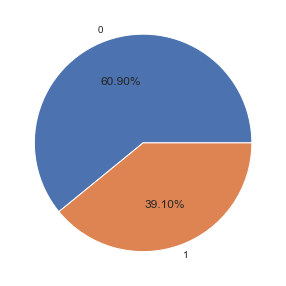

In [ ]:
labels= target_distrib.index

fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(target_distrib, labels = labels ,autopct='%1.2f%%')
plt.show()

La variable target está "medianamente desbalanceada". Éste tema lo volveremos a retormar cuando nos metamos en el modelo.

### "Rating"

Miraremos la distribucion segun el rating. Como ya sabemos, esta feature ya no la podremos usar ya que conforma nuestro target, pero la miraremos a modo ilustrativo.

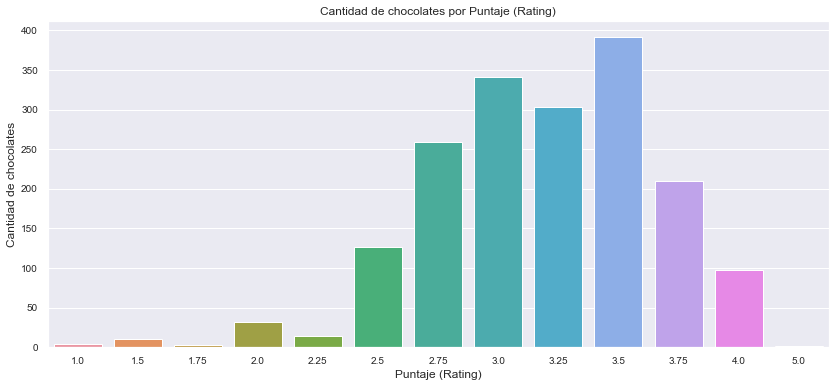

In [ ]:
rcParams['figure.figsize'] = 14,6
trabajos = sns.countplot(x = 'Rating', data = df)#,
              #order = df['Rating'].value_counts().index)
plt.xlabel("Puntaje (Rating)")
plt.ylabel("Cantidad de chocolates")
plt.title("Cantidad de chocolates por Puntaje (Rating)") 
plt.show(trabajos)


In [ ]:
df.Rating.value_counts()

3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    126
4.00     97
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: Rating, dtype: int64

### "Review Date"

Para entender la distribución de la variable target a lo largo de los años en los que se fueron haciendo las reviews...

In [ ]:
paleta = ["#fc8d59","#3288bd"]
yes_df = df[df['chocolate_acceptance'] == 1]
no_df = df[df['chocolate_acceptance'] == 0]

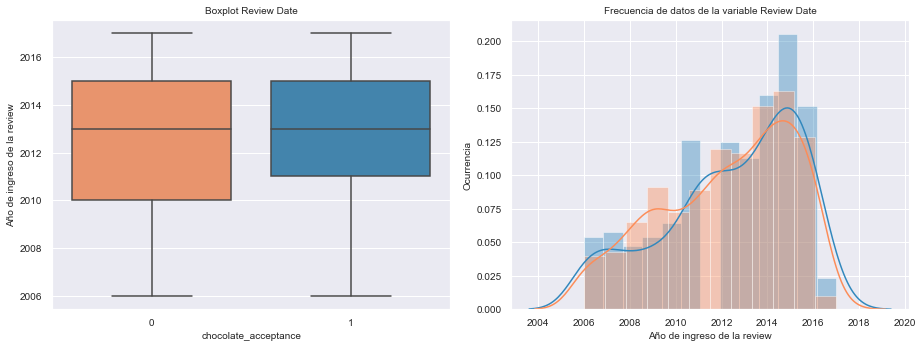

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))


sns.boxplot(y='Review Date', x='chocolate_acceptance', data=df, palette=paleta, ax = ax1)
ax1.set_xlabel('chocolate_acceptance', fontsize=10)
ax1.set_ylabel('Año de ingreso de la review', fontsize=10)
ax1.set_title('Boxplot Review Date', fontsize=10)
ax1.tick_params(labelsize=10)


sns.distplot(yes_df['Review Date'],color='#3288bd', ax = ax2)
sns.distplot(no_df['Review Date'],color = '#fc8d59', ax = ax2) 
ax2.set_xlabel('Año de ingreso de la review', fontsize=10)
ax2.set_ylabel('Ocurrencia', fontsize=10)
ax2.set_title('Frecuencia de datos de la variable Review Date', fontsize=10)
ax2.tick_params(labelsize=10)



plt.subplots_adjust(wspace=0.5)

plt.tight_layout() 

Por deduccion, la fecha de ingreso de la Review no debe tener incidencia sobre la calidad del chocolate. Igual revisaremos la tasa de aceptacion del chocolate segun año de ingreso de la critica o review.

In [ ]:

cross_tab_review = pd.crosstab(df['chocolate_acceptance_yn'],df["Review Date"]).apply(lambda x: x/x.sum() * 100)
cross_tab_review = cross_tab_review.transpose()
cross_tab_review



chocolate_acceptance_yn,no,yes
Review Date,,
2006,55.555556,44.444444
2007,55.844156,44.155844
2008,69.892473,30.107527
2009,73.983740,26.016260
2010,65.765766,34.234234
2011,54.268293,45.731707
2012,61.855670,38.144330
2013,63.586957,36.413043
2014,61.538462,38.461538


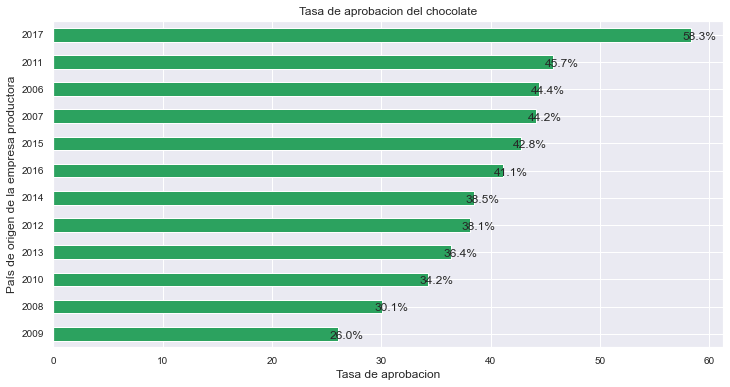

In [ ]:
review = cross_tab_review['yes'].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de aprobacion del chocolate')
plt.xlabel('Tasa de aprobacion')
plt.ylabel('País de origen de la empresa productora')

# Por estas funciones prefiero ggplot
for rec, label in zip(review.patches,
                      cross_tab_review["yes"].sort_values(ascending = True).round(1).astype(str)):
    review.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### "Company Location"

Vamos a visualizar la distribución del target según la compañía productora del chocolate y de donde viene el grano. Nos quedaremos con el top 10 de ambos para graficarlo por cuestiones prácticas. Ademas ahi se encuentra la gran mayoria de instancias.

In [ ]:
top_company=['U.S.A.', 'France', 'Canada', 'U.K.', 'Italy', 'Ecuador',
       'Australia', 'Belgium', 'Switzerland', 'Germany']

mask_top_company=df["Company Location"].apply(lambda x: x in top_company) 


In [ ]:

top_company=['U.S.A.', 'France', 'Canada', 'U.K.', 'Italy', 'Ecuador',
       'Australia', 'Belgium', 'Switzerland', 'Germany']

mask_top_company=df["Company Location"].apply(lambda x: x in top_company) 

Text(0.5, 1.0, 'Chocolate acceptance through company location')

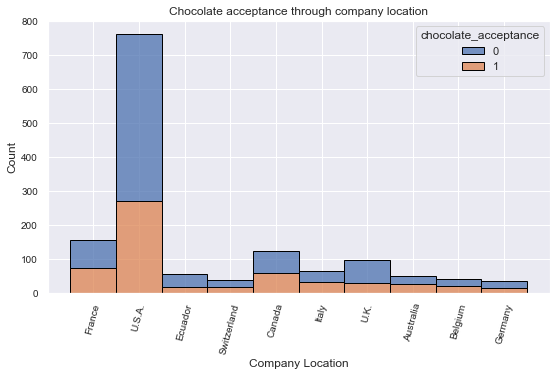

In [ ]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.histplot(data=df[mask_top_company], x="Company Location", hue='chocolate_acceptance', binwidth=10,multiple='stack',stat="count", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Company Location") 
plt.ylabel("Count")
plt.title("Chocolate acceptance through company location")

In [ ]:
df_top_company=df[mask_top_company]

cross_tab_company = pd.crosstab(df_top_company['chocolate_acceptance_yn'],df_top_company["Company Location"]).apply(lambda x: x/x.sum() * 100)
cross_tab_company = cross_tab_company.transpose()
cross_tab_company


chocolate_acceptance_yn,no,yes
Company Location,,
Australia,46.938776,53.061224
Belgium,52.500000,47.500000
Canada,52.419355,47.580645
Ecuador,70.370370,29.629630
France,52.564103,47.435897
Germany,62.857143,37.142857
Italy,50.793651,49.206349
Switzerland,52.631579,47.368421
U.K.,70.833333,29.166667


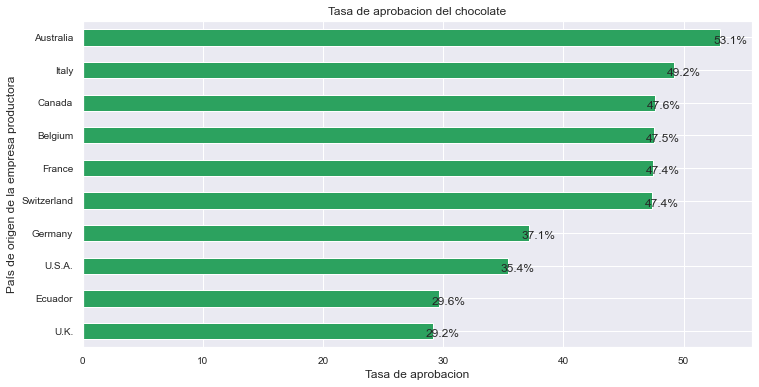

In [ ]:
company = cross_tab_company['yes'].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de aprobacion del chocolate')
plt.xlabel('Tasa de aprobacion')
plt.ylabel('País de origen de la empresa productora')

# Por estas funciones prefiero ggplot
for rec, label in zip(company.patches,
                      cross_tab_company["yes"].sort_values(ascending = True).round(1).astype(str)):
    company.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Podriamos decir que en promedio, los mejores chocolates son producidos por Australia.

### "Broad Bean Origin"

In [ ]:
df["Broad Bean Origin"].value_counts().head(10)

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: Broad Bean Origin, dtype: int64

Hay nulos escondidos con un string vacío en "Broad Bean Origin". Corresponden a 73 registros, los mantendremos como una categoria. Otorgaremos la palabra "unknown".

In [ ]:
hide_nulls_index=df[df["Broad Bean Origin"]== "\xa0"].index
hide_nulls_index

Int64Index([  77,   85,   86,   87,  144,  148,  182,  214,  245,  277,  329,
             381,  393,  416,  417,  421,  465,  482,  554,  564,  565,  634,
             644,  739,  749,  754,  755,  756,  759,  760,  762,  764,  769,
             770,  772,  774,  775,  776,  777,  779,  897,  937,  938,  975,
            1048, 1074, 1114, 1115, 1120, 1129, 1175, 1231, 1272, 1366, 1374,
            1411, 1414, 1436, 1439, 1440, 1443, 1506, 1526, 1624, 1625, 1683,
            1686, 1694, 1766, 1774, 1778, 1780, 1789],
           dtype='int64')

In [ ]:
df["Broad Bean Origin"]=df["Broad Bean Origin"].apply(lambda x : "unknown" if x=="\xa0" else x)

In [ ]:
#df['Broad Bean Origin'] = df['Broad Bean Origin'].map({'\xa0':"unknown"})

In [ ]:
top_bean=list(df["Broad Bean Origin"].value_counts().head(10).index)

mask_top_bean=df["Broad Bean Origin"].apply(lambda x: x in top_bean) 


Text(0.5, 1.0, 'Bean Origin through company location')

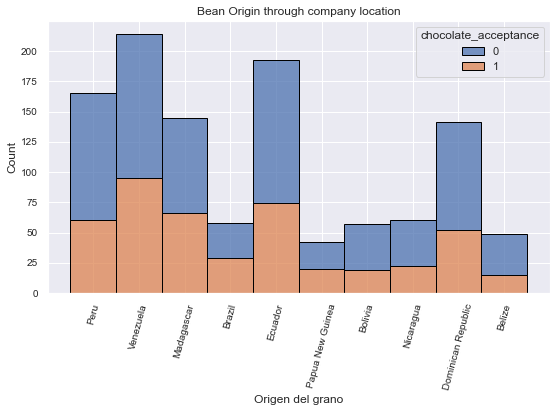

In [ ]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.histplot(data=df[mask_top_bean], x="Broad Bean Origin", hue='chocolate_acceptance', binwidth=10,multiple='stack',stat="count", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Origen del grano") 
plt.ylabel("Count")
plt.title("Bean Origin through company location")

In [ ]:
df_top_bean=df[mask_top_bean]

In [ ]:
cross_tab_origin = pd.crosstab(df_top_bean['chocolate_acceptance_yn'],df_top_bean['Broad Bean Origin']).apply(lambda x: x/x.sum() * 100)
cross_tab_origin = cross_tab_origin.transpose()
cross_tab_origin


chocolate_acceptance_yn,no,yes
Broad Bean Origin,,
Belize,69.387755,30.612245
Bolivia,66.666667,33.333333
Brazil,50.000000,50.000000
Dominican Republic,63.120567,36.879433
Ecuador,61.658031,38.341969
Madagascar,54.482759,45.517241
Nicaragua,63.333333,36.666667
Papua New Guinea,52.380952,47.619048
Peru,63.636364,36.363636


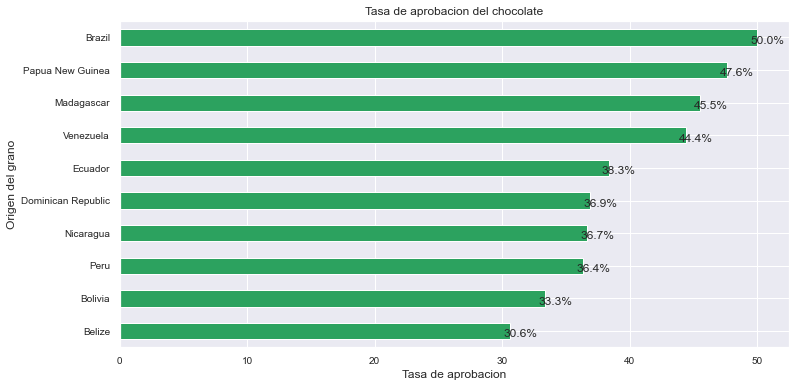

In [ ]:
origin = cross_tab_origin['yes'].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de aprobacion del chocolate')
plt.xlabel('Tasa de aprobacion')
plt.ylabel('Origen del grano')

# Por estas funciones prefiero ggplot
for rec, label in zip(origin.patches,
                      cross_tab_origin["yes"].sort_values(ascending = True).round(1).astype(str)):
    origin.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Podriamos decir que los granos que producen mejor chocolate en promedio, son los de Brasil.

Descrubrimos nuevos nulos encondidos con un string vacío en "Bean Type". Esta vez son 836, lo cual representa un 49% de los datos. No tiene ningun sentido imputarlos, hay riesgo de producir un gran bias. Al igual que con "Broad Bean Origin", a estos "nulos", los consideraremos una categoría, "unknown".

In [ ]:
df["Bean Type"][df["Bean Type"]== "\xa0"].count()

0

In [ ]:
df["Bean Type"]=df["Bean Type"].apply(lambda x : "unknown" if x=="\xa0" else x)

Vamos a crear rangos de porcentaje de cacao en base a la feature "Cocoa Percent", para que sea más práctico el trabajo sobre ella.

In [ ]:
ranges=[0,0.5,0.6,0.7,0.8,1]
labels= ["50% and under","51%-60%","61%-70%","71%-80%","over 80%"]

df["cocoa_percent_range"]=pd.cut(df['Cocoa Percent'],bins= ranges,labels=labels)

Text(0.5, 1.0, 'Porcentaje de cacao y target')

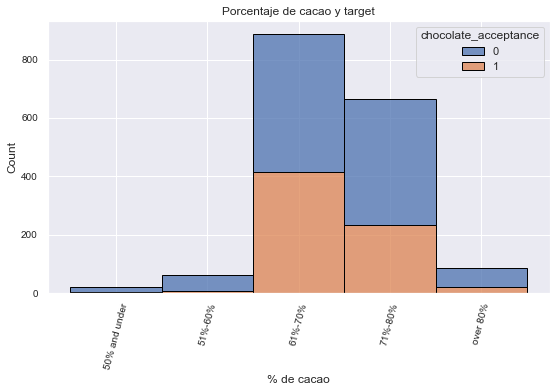

In [ ]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.histplot(data=df, x="cocoa_percent_range", hue='chocolate_acceptance', binwidth=10,multiple='stack',stat="count", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("% de cacao") 
plt.ylabel("Count")
plt.title("Porcentaje de cacao y target")

In [ ]:
cross_tab_cocoa = pd.crosstab(df['chocolate_acceptance_yn'],df['cocoa_percent_range']).apply(lambda x: x/x.sum() * 100)
cross_tab_cocoa = cross_tab_cocoa.transpose()
cross_tab_cocoa

chocolate_acceptance_yn,no,yes
cocoa_percent_range,,
50% and under,91.304348,8.695652
51%-60%,86.111111,13.888889
61%-70%,53.354978,46.645022
71%-80%,65.153734,34.846266
over 80%,78.021978,21.978022


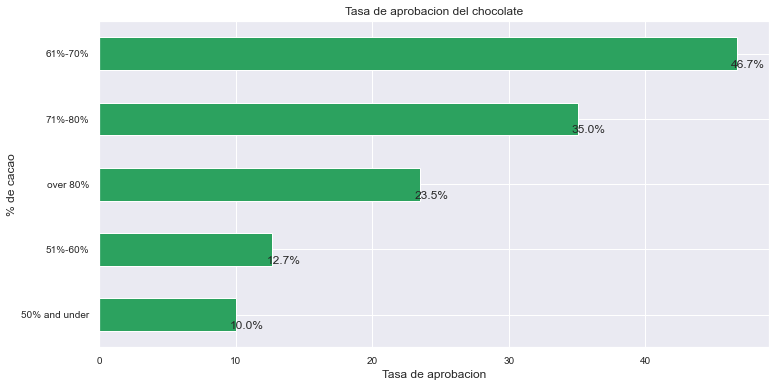

In [ ]:
cocoa = cross_tab_cocoa['yes'].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de aprobacion del chocolate')
plt.xlabel('Tasa de aprobacion')
plt.ylabel('% de cacao')

# Por estas funciones prefiero ggplot
for rec, label in zip(cocoa.patches,
                      cross_tab_cocoa["yes"].sort_values(ascending = True).round(1).astype(str)):
    cocoa.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

La mejor calidad de chocolates, parece estar en el rango de 61%-70% de cacao.

### "Chocolate Bar Origin" 

In [ ]:
top_choc_bar_orig=list(df["Chocolate Bar Origin"].value_counts().head(10).index)

mask_top_choc_bar=df["Chocolate Bar Origin"].apply(lambda x: x in top_choc_bar_orig) 


Text(0.5, 1.0, 'Origen de la barra del chocolate y target')

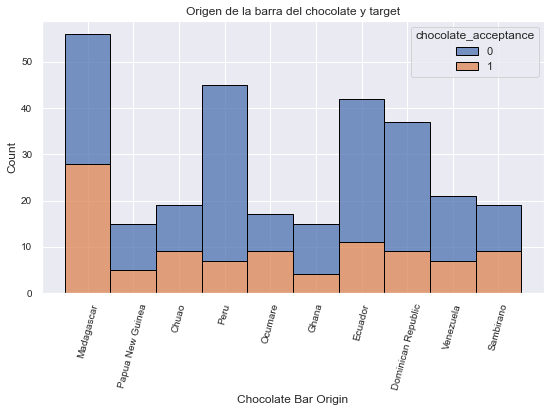

In [ ]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.histplot(data=df[mask_top_choc_bar], x="Chocolate Bar Origin", hue='chocolate_acceptance', binwidth=10,multiple='stack',stat="count", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Chocolate Bar Origin") 
plt.ylabel("Count")
plt.title("Origen de la barra del chocolate y target")

In [ ]:
df_top_bar_orig=df[mask_top_choc_bar]

cross_tab_bar_orig = pd.crosstab(df_top_bar_orig['chocolate_acceptance_yn'],df_top_bar_orig["Chocolate Bar Origin"]).apply(lambda x: x/x.sum() * 100)
cross_tab_bar_orig = cross_tab_bar_orig.transpose()
cross_tab_bar_orig


chocolate_acceptance_yn,no,yes
Chocolate Bar Origin,,
Chuao,52.631579,47.368421
Dominican Republic,75.675676,24.324324
Ecuador,73.809524,26.190476
Ghana,73.333333,26.666667
Madagascar,50.000000,50.000000
Ocumare,47.058824,52.941176
Papua New Guinea,66.666667,33.333333
Peru,84.444444,15.555556
Sambirano,52.631579,47.368421


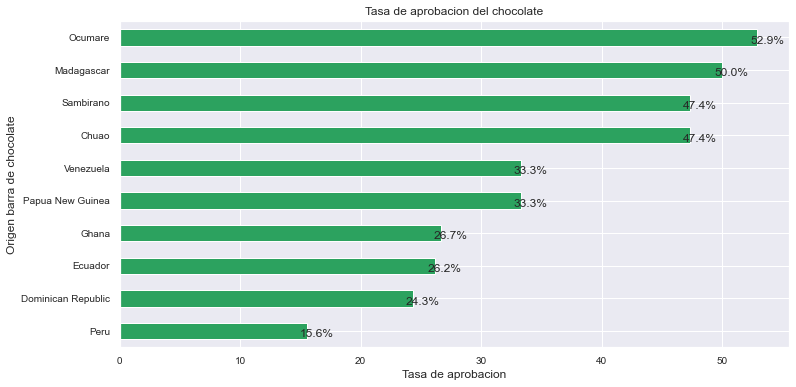

In [ ]:
orig = cross_tab_bar_orig['yes'].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de aprobacion del chocolate')
plt.xlabel('Tasa de aprobacion')
plt.ylabel('Origen barra de chocolate')

# Por estas funciones prefiero ggplot
for rec, label in zip(orig.patches,
                      cross_tab_bar_orig["yes"].sort_values(ascending = True).round(1).astype(str)):
    orig.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Las barras de chocolates con la mejor tasa de aceptación vienen de Ocumare.

### "Company"

In [ ]:
top_choc_company=list(df["Company"].value_counts().head(10).index)

mask_top_choc_company=df["Company"].apply(lambda x: x in top_choc_company) 



Text(0.5, 1.0, 'Compañia productora del chocolate y target')

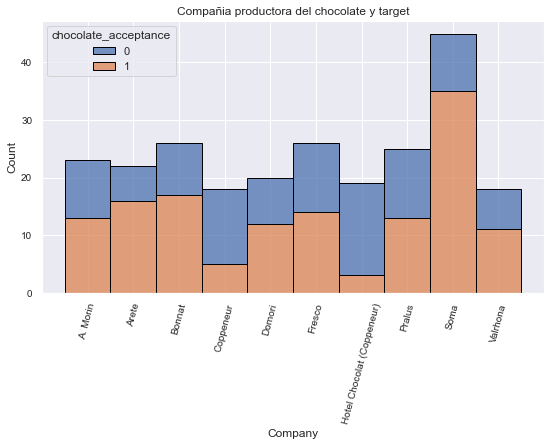

In [ ]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.histplot(data=df[mask_top_choc_company], x="Company", hue='chocolate_acceptance', binwidth=10,multiple='stack',stat="count", edgecolor ='black')
plt.setp( ax.get_xticklabels(),rotation=75)
plt.xlabel("Company") 
plt.ylabel("Count")
plt.title("Compañia productora del chocolate y target")

In [ ]:
df_top_choc_company=df[mask_top_choc_company]

cross_tab_choc_company = pd.crosstab(df_top_choc_company['chocolate_acceptance_yn'],df_top_choc_company["Company"]).apply(lambda x: x/x.sum() * 100)
cross_tab_choc_company = cross_tab_choc_company.transpose()
cross_tab_choc_company



chocolate_acceptance_yn,no,yes
Company,,
A. Morin,43.478261,56.521739
Arete,27.272727,72.727273
Bonnat,37.037037,62.962963
Domori,36.363636,63.636364
Fresco,46.153846,53.846154
Guittard,63.636364,36.363636
Hotel Chocolat (Coppeneur),84.210526,15.789474
Pralus,48.000000,52.000000
Soma,23.913043,76.086957


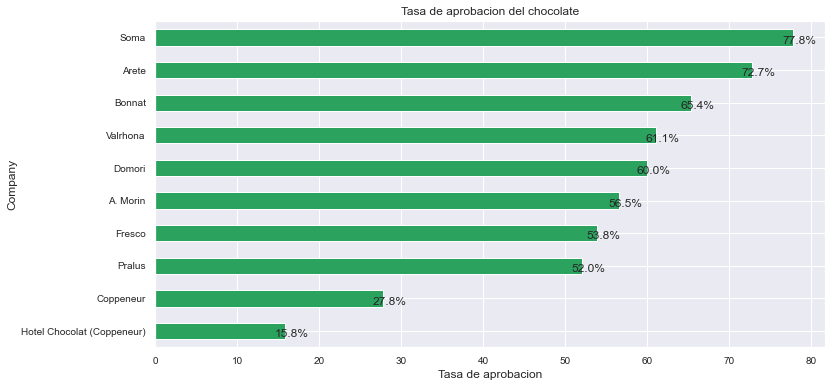

In [ ]:
comp = cross_tab_choc_company['yes'].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de aprobacion del chocolate')
plt.xlabel('Tasa de aprobacion')
plt.ylabel('Company')

# Por estas funciones prefiero ggplot
for rec, label in zip(comp.patches,
                      cross_tab_choc_company["yes"].sort_values(ascending = True).round(1).astype(str)):
    comp.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

La compañía Soma produce las barras de chocolate con mejor tasa de aceptacion.

## 5) Outliers

In [ ]:
df._get_numeric_data().head(3)


,REF,Review Date,Cocoa Percent,Rating,chocolate_acceptance
0,1876,2016,0.63,3.75,1
1,1676,2015,0.70,2.75,0
2,1676,2015,0.70,3.00,0


Buscaremos outliers unicamente en "Cocoa Percent", ya que "REF", "Review Date" y "Rating" corresponden a variables numéricas ordinales y analizando los casos puntuales, no vemos mucha conveniencia en hacerlo. Las primeras dos, hacen referencia a momentos en el tiempo. El Rating corresponde a clasificaciones de los chocolates, variable que forma muy directamente nuestro target.

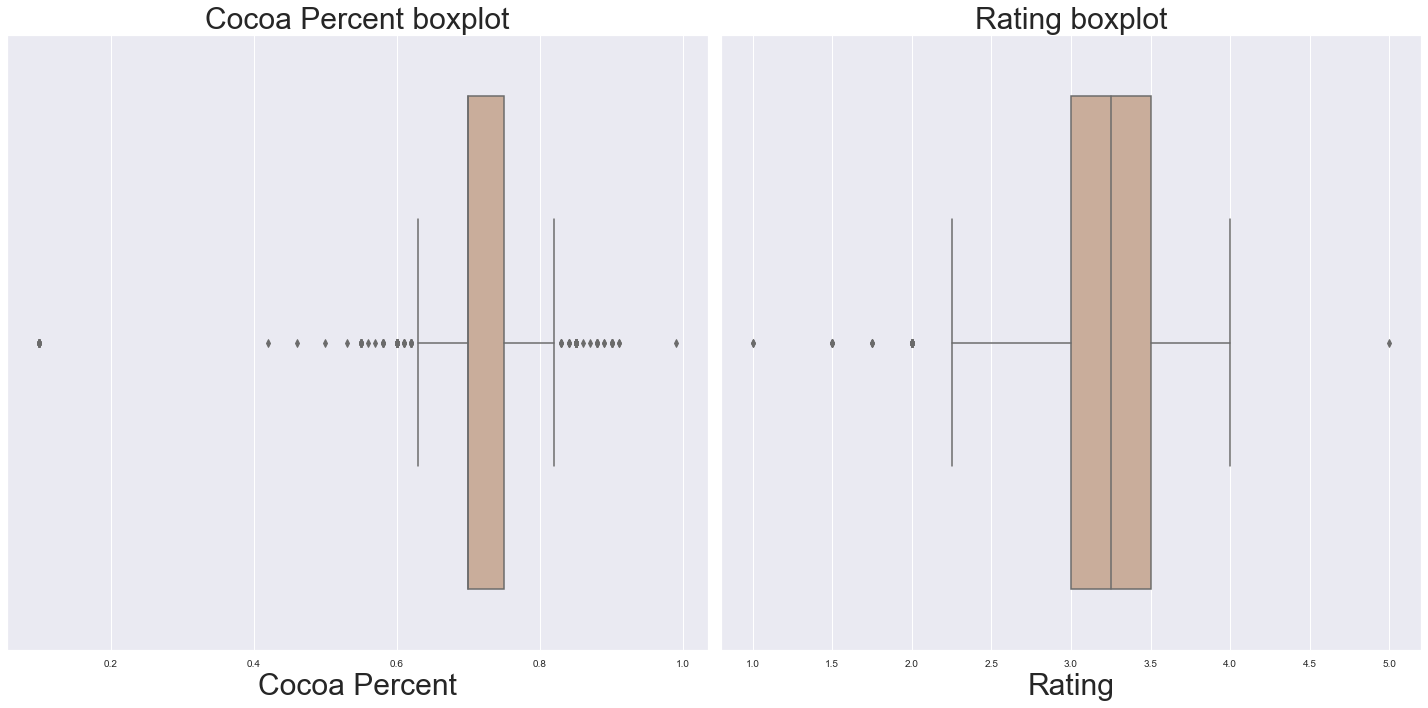

In [ ]:
plt.figure(figsize = (20,10))

plt.subplot(1, 2, 1)
sns.boxplot(data = df, x= 'Cocoa Percent', palette = 'pink')
plt.title('Cocoa Percent boxplot',size=30)
plt.xlabel('Cocoa Percent',size=30)

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x= "Rating", palette = 'pink')
plt.title('Rating boxplot',size=30)
plt.xlabel('Rating',size=30)

plt.tight_layout()
plt.show()

Vemos algunos outliers en ambas features. Haciendo investigación del producto (chocolate), existen efectivamente chocolates con un porcentaje de cacao menor a 50%, incluso 10% (los chocolates de leche por ejemplo, suelen tener un porcentaje muy bajo de cacao). 

En el lado contrario, los chocolates amargos y más "sanos", suelen tener sobre un 70% de cacao al menos, por consiguiente, no vemos valores que puedieran ser considerados atípicos, ya que muy normalmente le podria llegar a nuestro modelo, un chocolate a clasificar que posea un porcentaje de cacao similar a los que se presentan en el rango de la feature "Cocoa Percent".



## 6) Modelización

Dropeamos la columna de target "chocolate_acceptance_yn" (yes / no), que habiamos creado para visualizacion y nos quedamos con la binaria.

In [ ]:
df.drop(columns="chocolate_acceptance_yn",inplace=True,axis=1)

Dropeamos columna "Rating", que como ya hemos hablado, forma muy directamente el target. De no ser eliminada, distorcionaría nuestro modelo.

In [ ]:
df.drop(columns="Rating",inplace=True,axis=1)

Dropeamos columna "review_date_datetime", la creamos a modo exploratorio, ya no nos sirve de mucho y es redundante con "REF" y "Review Date".

In [ ]:
df.drop(columns="review_date_datetime",inplace=True,axis=1)

In [ ]:
df.columns

Index(['Company', 'Chocolate Bar Origin', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Bean Type', 'Broad Bean Origin',
       'chocolate_acceptance', 'cocoa_percent_range'],
      dtype='object')

In [ ]:
df.dtypes

Company                   object
Chocolate Bar Origin      object
REF                        int64
Review Date                int64
Cocoa Percent            float64
Company Location          object
Broad Bean Origin         object
chocolate_acceptance       int64
cocoa_percent_range     category
dtype: object

In [ ]:
categorical_columns=['Company', 'Chocolate Bar Origin','Company Location', 'Broad Bean Origin','cocoa_percent_range', "Bean Type"]


### Binarizacion de variables categoricas

In [ ]:
df_dummies = pd.get_dummies(df, columns = categorical_columns)

In [ ]:
print(df_dummies.shape)

df_dummies.head(2)

(1793, 1663)


,REF,Review Date,Cocoa Percent,chocolate_acceptance,Company_A. Morin,Company_AMMA,Company_Acalli,Company_Adi,Company_Aequare (Gianduja),Company_Ah Cacao,Company_Akesson's (Pralus),Company_Alain Ducasse,Company_Alexandre,Company_Altus aka Cao Artisan,Company_Amano,Company_Amatller (Simon Coll),Company_Amazona,Company_Ambrosia,Company_Amedei,Company_Anahata,Company_Animas,Company_Ara,Company_Arete,Company_Artisan du Chocolat,Company_Artisan du Chocolat (Casa Luker),Company_Askinosie,Company_Bahen & Co.,Company_Bakau,Company_Bar Au Chocolat,Company_Baravelli's,Company_Batch,Company_Beau Cacao,Company_Beehive,Company_Belcolade,Company_Bellflower,Company_Belyzium,Company_Benoit Nihant,Company_Bernachon,Company_Beschle (Felchlin),Company_Bisou,Company_Bittersweet Origins,Company_Black Mountain,Company_Black River (A. Morin),Company_Blanxart,Company_Blue Bandana,Company_Bonnat,Company_Bouga Cacao (Tulicorp),Company_Bowler Man,Company_Brasstown aka It's Chocolate,Company_Brazen,Company_Breeze Mill,Company_Bright,Company_Britarev,Company_Bronx Grrl Chocolate,Company_Burnt Fork Bend,Company_C-Amaro,Company_Cacao Arabuco,Company_Cacao Atlanta,Company_Cacao Barry,Company_Cacao Hunters,Company_Cacao Market,Company_Cacao Prieto,Company_Cacao Sampaka,Company_Cacao Store,Company_Cacao de Origen,Company_Cacao de Origin,Company_Cacaosuyo (Theobroma Inversiones),Company_Cacaoyere (Ecuatoriana),Company_Callebaut,Company_Cao,Company_Caoni (Tulicorp),Company_Captain Pembleton,Company_Caribeans,Company_Carlotta Chocolat,Company_Castronovo,Company_Cello,Company_Cemoi,Company_Chaleur B,Company_Charm School,Company_Chchukululu (Tulicorp),Company_Chequessett,Company_Chloe Chocolat,Company_Chocablog,Company_Choco Del Sol,Company_Choco Dong,Company_ChocoReko,Company_Chocola'te,Company_Chocolarder,Company_Chocolate Alchemist-Philly,Company_Chocolate Con Amor,Company_Chocolate Conspiracy,Company_Chocolate Makers,"Company_Chocolate Tree, The",Company_Chocolats Privilege,Company_Chocosol,Company_Chocovic,Company_Chocovivo,Company_Choklat,Company_Chokolat Elot (Girard),Company_Choocsol,Company_Christopher Morel (Felchlin),Company_Chuao Chocolatier,Company_Chuao Chocolatier (Pralus),Company_Claudio Corallo,Company_Cloudforest,Company_Coleman & Davis,Company_Compania de Chocolate (Salgado),Company_Condor,Company_Confluence,Company_Coppeneur,Company_Cote d' Or (Kraft),Company_Cravve,Company_Creo,Company_DAR,Company_Daintree,Company_Dalloway,Company_Damson,Company_Dandelion,Company_Danta,Company_Dark Forest,Company_Davis,Company_De Mendes,Company_De Villiers,Company_DeVries,Company_Dean and Deluca (Belcolade),Company_Debauve & Gallais (Michel Cluizel),Company_Desbarres,Company_Dick Taylor,Company_Doble & Bignall,Company_Dole (Guittard),Company_Dolfin (Belcolade),Company_Domori,Company_Dormouse,Company_Duffy's,Company_Dulcinea,Company_Durand,Company_Durci,Company_ENNA,Company_East Van Roasters,Company_Eau de Rose,Company_Eclat (Felchlin),Company_Edelmond,Company_El Ceibo,Company_El Rey,Company_Emerald Estate,Company_Emily's,Company_Enric Rovira (Claudio Corallo),Company_Erithaj (A. Morin),Company_Escazu,Company_Ethel's Artisan (Mars),Company_Ethereal,Company_Fearless (AMMA),Company_Feitoria Cacao,Company_Felchlin,Company_Finca,Company_Forever Cacao,Company_Forteza (Cortes),Company_Fossa,Company_Franceschi,Company_Frederic Blondeel,Company_French Broad,Company_Fresco,Company_Friis Holm,Company_Friis Holm (Bonnat),Company_Fruition,Company_Garden Island,Company_Georgia Ramon,Company_Glennmade,Company_Goodnow Farms,Company_Grand Place,Company_Green & Black's (ICAM),Company_Green Bean to Bar,Company_Grenada Chocolate Co.,Company_Guido Castagna,Company_Guittard,Company_Habitual,Company_Hachez,Company_Hacienda El Castillo,Company_Haigh,Company_Harper Macaw,Company_Heilemann,Company_Heirloom Cacao Preservation (Brasstown),Company_Heirloom Cacao Preservation (Fruition),Company_Heirloom Cacao Preservation (Guittard),Company_Heirloom Cacao Preservation (Manoa),Company_Heirloo

### Separación en train y test

In [ ]:
X = df_dummies.drop(['chocolate_acceptance'],axis=1)
y= df_dummies.chocolate_acceptance

In [ ]:
#Separacion en train y test de X e y
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=14, stratify=y)

In [ ]:
years=2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017

ref_cat=set(df.REF.unique())
ref_cat=list(ref_cat)

ref=ref_cat

In [ ]:
enc=OrdinalEncoder(categories=[years,ref_cat])

In [ ]:
enc.fit(X_train[["Review Date","REF"]])

OrdinalEncoder(categories=[(2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
                            2014, 2015, 2016, 2017),
                           [5, 15, 24, 32, 40, 48, 56, 63, 75, 81, 87, 93, 99,
                            105, 111, 117, 123, 129, 135, 141, 147, 153, 157,
                            162, 166, 170, 175, 180, 184, 188, ...]])

In [ ]:
ord_enc_cols=enc.transform(X_train[["Review Date","REF"]])


In [ ]:
X_train["Review Date"]=ord_enc_cols[:,0]
X_train["REF"]=ord_enc_cols[:,1]


In [ ]:
ord_enc_cols=enc.transform(X_test[["Review Date","REF"]])

X_test["Review Date"]=ord_enc_cols[:,0]
X_test["REF"]=ord_enc_cols[:,1]

### Estandarizacion de features numéricas

In [ ]:
numerical_columns=['REF', 'Review Date','Cocoa Percent']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

round(X_train[numerical_columns].describe(),2)



,REF,Review Date,Cocoa Percent
count,1344.00,1344.00,1344.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-1.68,-2.15,-7.00
25%,-0.91,-0.79,-0.07
50%,-0.01,0.22,-0.07
75%,0.87,0.90,0.50
max,1.71,1.58,3.27


In [ ]:
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

round(X_test[numerical_columns].describe(),2)

,REF,Review Date,Cocoa Percent
count,449.00,449.00,449.00
mean,-0.04,-0.02,0.03
std,0.96,0.97,0.93
min,-1.67,-2.15,-7.00
25%,-0.88,-0.79,-0.07
50%,0.04,0.22,-0.07
75%,0.75,0.90,0.50
max,1.70,1.58,2.35


## Random Forest

In [ ]:
df.columns

Index(['Company', 'Chocolate Bar Origin', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Bean Type', 'Broad Bean Origin',
       'chocolate_acceptance', 'cocoa_percent_range'],
      dtype='object')

In [ ]:
numerical_columns = ['REF', 'Review Date',
       'Cocoa Percent']

categorical_cols = ['Company', 'Chocolate Bar Origin','Company Location', 'Bean Type', 'Broad Bean Origin',"cocoa_percent_range"]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6837416481069042

In [ ]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[240,  33],
       [109,  67]])

## KNN

In [ ]:
#Importamos nuestro buscador de mejores paramentros
from sklearn.model_selection import GridSearchCV

In [ ]:
#Empezamos probando con KNN
knn = KNeighborsClassifier()

In [ ]:
#Se asignan los parametros que se quieren probar
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [ ]:
#Import de la herramienta de cross validation
from sklearn.model_selection import StratifiedKFold

In [ ]:
#Se instancia el grid search con todos los parametros y el CV
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
grid = GridSearchCV(knn, param_grid, cv=folds, scoring="accuracy")

In [ ]:
#Se entrena al modelo con los X e y train
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
#Observamos como le fue al modelo
print("Mejores hyperparametros:", grid.best_params_)
print("Mejor score:", grid.best_score_)
print("Mejor estimador:", grid.best_estimator_)

Mejores hyperparametros: {'n_neighbors': 6, 'weights': 'distance'}
Mejor score: 0.6426356589147287
Mejor estimador: KNeighborsClassifier(n_neighbors=6, weights='distance')


## Regresión Logística

In [ ]:
#Probamos con Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
#Ponemos los parametros para que busque al mejor
lr = LogisticRegression()

c_option = [0.1, 0.5, 1, 10, 100, 1000]
penalty_option = ["l2"]
solver_option = ["lbfgs"]

param_lr = dict(C=c_option, penalty=penalty_option, solver=solver_option)
param_lr

{'C': [0.1, 0.5, 1, 10, 100, 1000], 'penalty': ['l2'], 'solver': ['lbfgs']}

In [ ]:
grid_lr = GridSearchCV(lr, param_grid=param_lr, cv=folds, scoring="accuracy")

In [ ]:
#Se entrena al modelo
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 100, 1000], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [ ]:
#Vemos los valores
print("Mejores hyperparametros:", grid_lr.best_params_)
print("Mejor score:", grid_lr.best_score_)
print("Mejor estimador:", grid_lr.best_estimator_)

Mejores hyperparametros: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor score: 0.6674418604651164
Mejor estimador: LogisticRegression(C=1)


## Naive Bayes

In [ ]:
#Ahora con Gaussian Naive bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_b = GaussianNB()

In [ ]:
#Se entrena al modelo
naive_b.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Predicion para ver el rendimiento del modelo
y_pred_nb = naive_b.predict(X_test)

round(accuracy_score(y_test, y_pred_nb), 2)

0.57

In [ ]:
#Parece que el mejor modelo fue el de regresion logistica, probamos hacer un predict
y_pred_lr = grid_lr.predict(X_test)

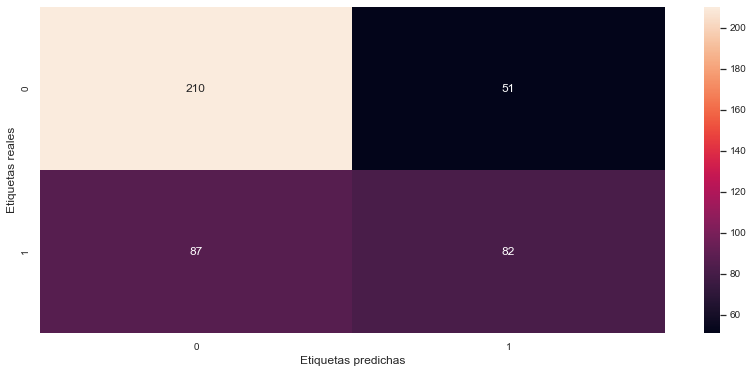

In [ ]:
#Visualizamos la matriz de confusion
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [ ]:
#Vemos el reporte de clasificaicon
print (classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       261
           1       0.62      0.49      0.54       169

    accuracy                           0.68       430
   macro avg       0.66      0.64      0.65       430
weighted avg       0.67      0.68      0.67       430



In [ ]:
#Importamos herramientas para verificar el modelo
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
y_pred_proba = grid_lr.predict_proba(X_test)

In [ ]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])

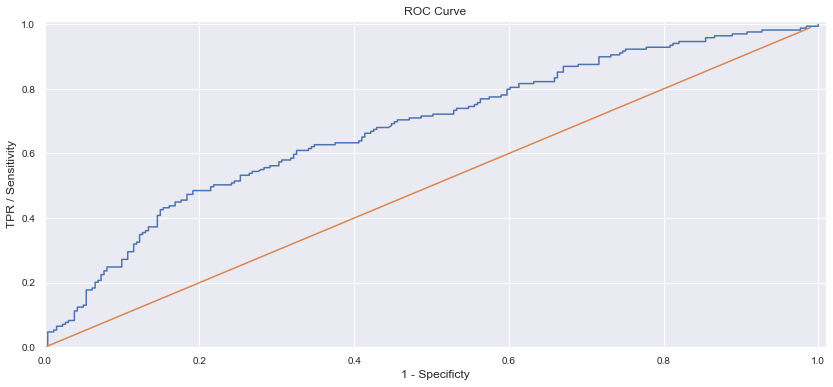

In [ ]:
#Vemos la curva roc
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()